# Module 8 Exercise - Data Storytelling

In this exercise, you will **create a narrative visualization with a data set of your choosing**. You can choose any data set you can find on the Internet or a data set related to your current line of work. 

**You will create visualizations to give a message, make a point, or convince your audience by using all the techniques we have seen throughout the course.**

Here is a list of your tasks:

1. Find a data set and upload it to your exercises folder in module 8. 

2. Write your R code **in this exercise notebook** to create your visualizations, and save them under the `exercises` folder.

3. Create a **narrative visualization document** using **any** software you want (Word, PowerPoint, Photoshop, etc.) by pasting your visualizations and creating all necessary elements (captions, text annotations, layout, etc.) 

4. Save your end product as a **pdf file** and upload it to your exercises folder (**name it L8_Exercise.pdf**)

Make sure that you start with a clear message in mind, and filter and format your data accordingly, and create the visualizations that will **support that message**. 

You need to have **at least one major visualization, and a number of supporting smaller graphs (2, 3, or more)**. Make sure to have a **clean layout**, and **enough text annotations and captions** to make your message clear. 

You can choose any type of visualization that you believe will be most **effective** for the type of data and the message you have chosen. 

You will be graded by the quality of your visualizations and storytelling; **make sure to use everything you have learned in this course.** 

This exercise is about creating a quickly consumable product; Do **NOT** create a report or lengthy power point presentation. You can choose a poster format or few slides to tell your story (a unique angle) for the data set you have chosen. 

---

Following is to show how to plot to a file to save a graph:

In [1]:
# this is how you save a plot to a file
library(ggplot2)
library(dplyr)
library(lubridate)
library(scales)
library(tidyr)
library(ggmap)

# comment this out to see the plot in the notebook 
#png(filename="NYmap.png")

# your plot here..


# comment this out to see the plot in the notebook
#dev.off()


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


Make sure you have all axis labels set in R notebook before you save your plot. You can adjust width and height when saving your plots.  Here is a reference to png() function:
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html

**Activity:**

Date.Time,Lat,Lon,Base
<fct>,<dbl>,<dbl>,<fct>
8/1/2014 0:03:00,40.7366,-73.9906,B02512
8/1/2014 0:09:00,40.7260,-73.9918,B02512
8/1/2014 0:12:00,40.7209,-74.0507,B02512
8/1/2014 0:12:00,40.7387,-73.9856,B02512
8/1/2014 0:12:00,40.7323,-74.0077,B02512
8/1/2014 0:13:00,40.7349,-74.0033,B02512


Date.Time,Lat,Lon,Base,Day_of_Month,Weekday,Hour_of_Day
<dttm>,<dbl>,<dbl>,<fct>,<int>,<ord>,<int>
2014-08-01 00:03:00,40.7366,-73.9906,B02512,1,Fri,0
2014-08-01 00:09:00,40.7260,-73.9918,B02512,1,Fri,0
2014-08-01 00:12:00,40.7209,-74.0507,B02512,1,Fri,0
2014-08-01 00:12:00,40.7387,-73.9856,B02512,1,Fri,0
2014-08-01 00:12:00,40.7323,-74.0077,B02512,1,Fri,0
2014-08-01 00:13:00,40.7349,-74.0033,B02512,1,Fri,0


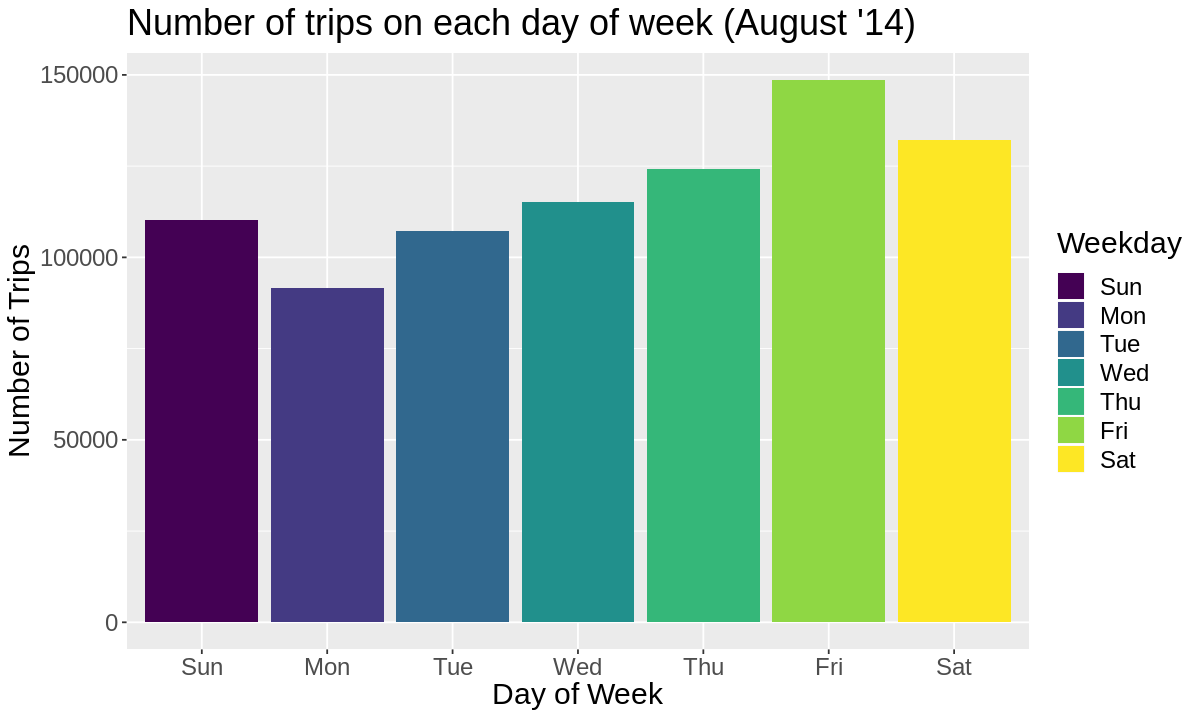

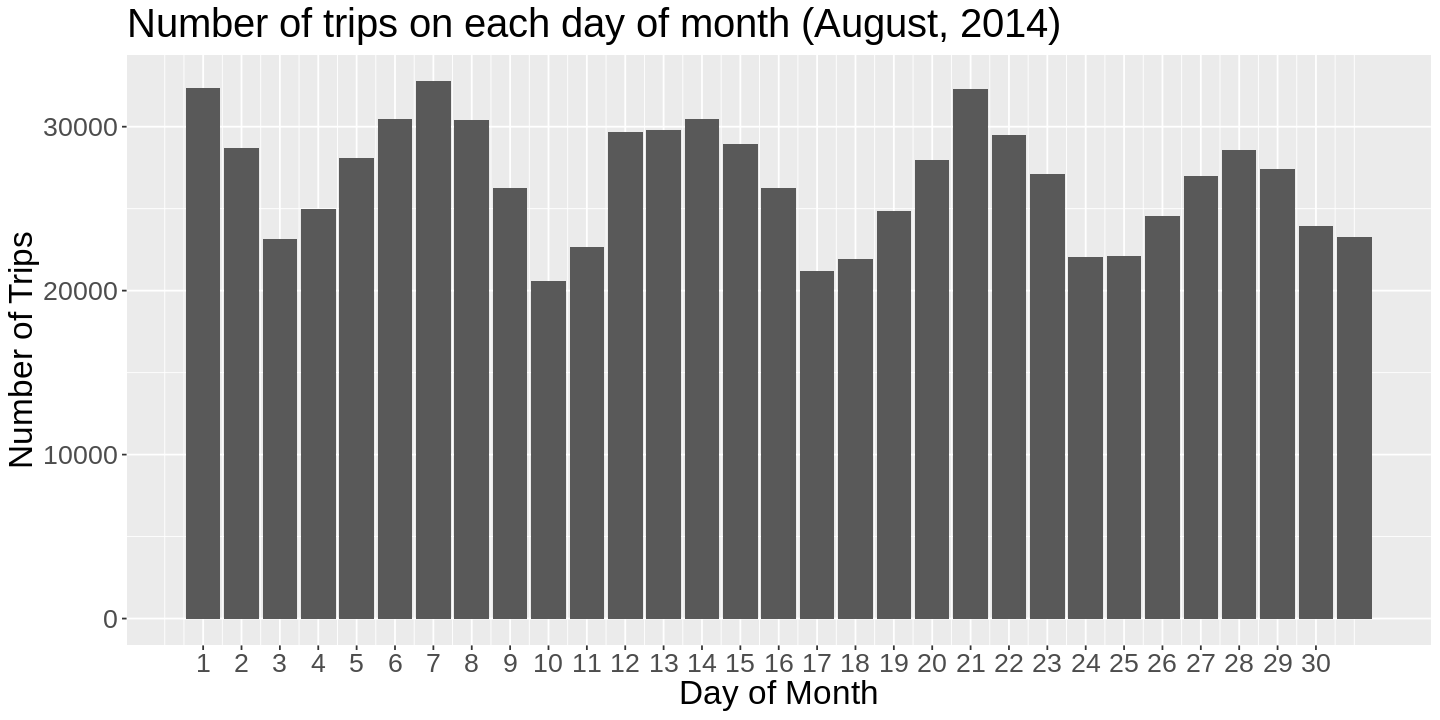

Warning message:
“Removed 105880 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 105880 rows containing non-finite values (stat_density2d).”

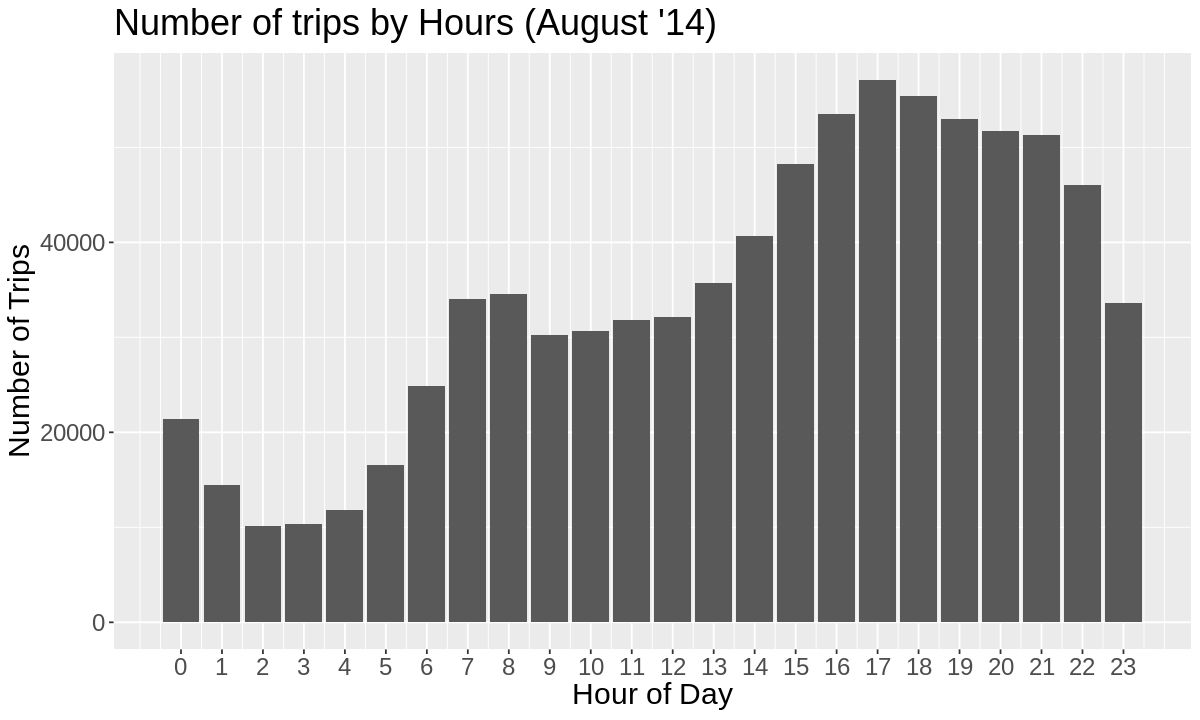

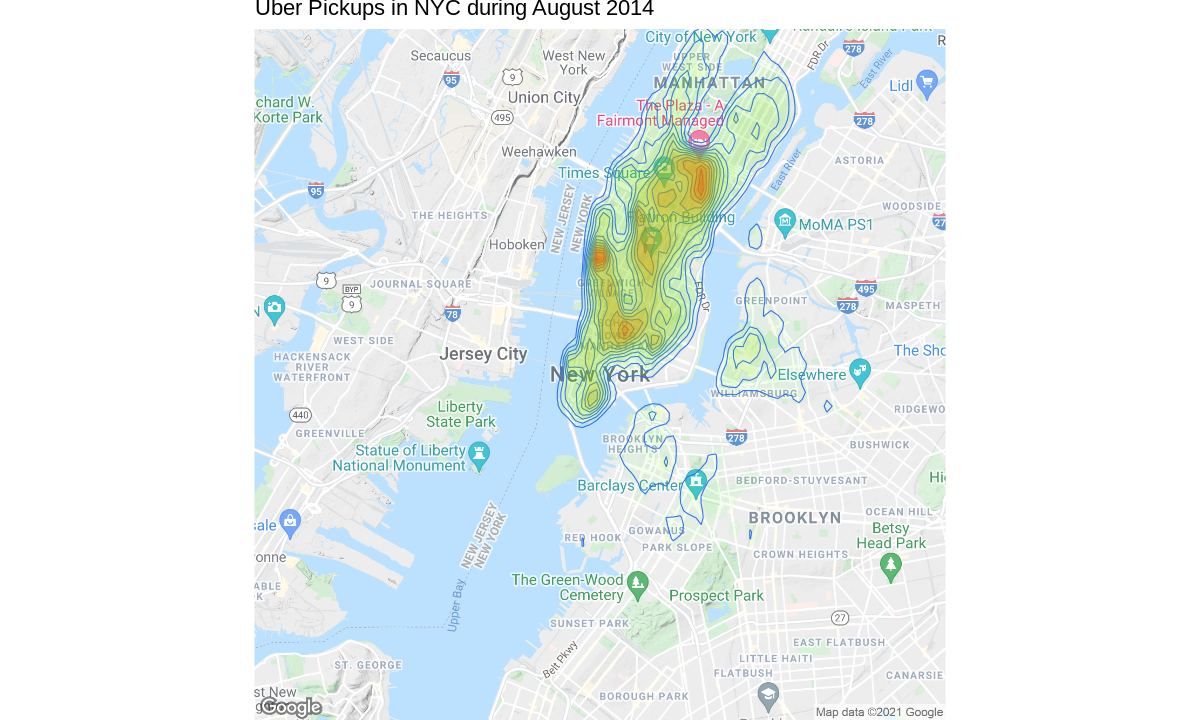

In [2]:
# Read your data here; 
uber_2014<- read.csv("uber_2014.csv")
head(uber_2014)
# Clean it up, reformat it, filter it, sort it, group it, etc.
uber_2014 <- mutate(uber_2014, Date.Time = parse_date_time(Date.Time, orders ="mdY HMS" ),
                 Day_of_Month = day(Date.Time), #Extracting day of August using Lubridate
                 Weekday = wday(Date.Time,label=TRUE),#Extracting day of the week
                 Hour_of_Day = hour(Date.Time)) #Extracting the hour of the day
head(uber_2014)
# Create your visualizations and save them as png files, then prepare your final pdf document elsewhere
# <- ALL YOUR CODE HERE -> 
options(repr.plot.width = 10, repr.plot.height = 6)
dow_plot <- uber_2014 %>% 
                arrange(Weekday) %>%
                group_by(Weekday) %>%
                summarise(freq = n()) %>%
                ggplot(aes(Weekday, freq,fill=Weekday)) +
                geom_bar(stat = "identity") +
                labs(x = "Day of Week", y = "Number of Trips") +
                theme(text = element_text(size = 18)) +
                ggtitle("Number of trips on each day of week (August '14)")
dow_plot

options(repr.plot.width = 12, repr.plot.height = 6)
dom_plot <- uber_2014 %>% 
                arrange(Day_of_Month) %>%
                group_by(Day_of_Month) %>%
                summarise(freq = n()) %>%
                ggplot(aes(Day_of_Month, freq)) +
                geom_bar(stat = "identity") +
                scale_x_continuous(breaks = seq(1, 30, 1)) +
                labs(x = "Day of Month", y = "Number of Trips") +
                theme(text = element_text(size = 20)) +
                ggtitle("Number of trips on each day of month (August, 2014)")
dom_plot

options(repr.plot.width = 10, repr.plot.height = 6)
how_plot <- uber_2014 %>% 
                arrange(Hour_of_Day) %>%
                group_by(Hour_of_Day) %>%
                summarise(freq = n()) %>%
                ggplot(aes(Hour_of_Day, freq)) +
                geom_bar(stat = "identity") +
                scale_x_continuous(breaks = seq(0, 23, 1)) +
                labs(x = "Hour of Day", y = "Number of Trips") +
                theme(text = element_text(size = 18)) +
                ggtitle("Number of trips by Hours (August '14)")
how_plot

apikey <- scan("/dsa/data/all_datasets/ggmap_api_key.txt", what="character")
register_google(key = apikey)

NY <- suppressMessages(get_map("New York",zoom=12, source = 'google'))
NYmap <- ggmap(NY, extent = "device", darken = c(.2,"white")) 
NYmap +
geom_density2d(data = uber_2014, aes(x = Lon, y = Lat), size = 0.3) + 
stat_density2d(data = uber_2014, aes(x = Lon, y = Lat, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon")  +
scale_fill_gradient("Uber\nPickups\nDensity",low = "green", high = "red")+
scale_alpha(range = c(0.05, 0.2), guide = FALSE) +
theme(legend.position = "none") + 
labs(title = "Uber Pickups in NYC during August 2014")


---

# Common Pitfalls / Inefficiencies

**BEFORE you submit your end product, pay attention to the following in your visualizations and story:**

---

### - Remember the design analysis questions:

**what, how, who, why?** 

- What are showing/telling? 
- How are you going to show it (efficiency? visual tasks like comparison, trends, query, etc.) 
- Who is your audience? Why should they care about what you have to tell? What are the **actionable** information they can take from your story? 
- Why are you telling the story? What is your angle, message, point? (make it clear in text AND visuals) 

---

### - Pay attention to the color schemes/palettes:

Do NOT use sequential palettes for data attributes that have no ordering; do NOT use qualitative color schemes for attributes where order matters. 

---

###  - Color coordinate among plots so that the same data attributes have the same color in all plots:

You can do that by creating a manual palette and use it everywhere to make sure same color is always assigned to the same attribute value (especially important for categories). Do not change color of the same category among plots!

---

###  - Perceptual grouping is important! group and/or order values:

People tend to make sense of things and compare better when they are ordered. 

- In a bar chart, **order the axes** by time, value, etc. to make comparisons more intuitive. 

- Pie chart: order wedges. 

- In a bubble map, if you want to show trends, use grouping variable to **connect** bubbles, etc. 

---

### - No lengthy text in x axis:

- **Flip** the axes of a bar chart so that string values (text) are readable on the y axis left to right, 

**or** 

- at least, put them slanted in x axis for better readibility. 

---

### - Plot only those that tell an obvious story:

**No crowded** scatter plots with useless linear regression lines that don't tell anything.  You do NOT have to plot ALL your data. Look at alternative plots to tell your story. **Also, look below:** 

---

### - If you have too many classes (discrete variables/categories), try to GROUP them:

- Instead of giving a color to each of the dozen or so categories, you can put them in meaningful groups and color code to reduce clutter. 

- For sequential variables, you can do the same thing by **binning** numbers into bins (like in a histogram). 

- **Stepped color palettes** may be more useful than smooth sequential palettes (especially for comparison in choropleth maps) for a large range of values in an attribute. 

- You can group/cluster data into meaningful chunks and display those as bubble charts, networks, geographical regions, etc. 

- Do NOT dump all the data in the plot unless there is a CLEAR pattern/clustering to it that can be perceived immediately. 

---

### - ANNOTATE! ANNOTATE! ANNOTATE!

- **Tell** your audience what they are supposed to see. 

- Use meaningful titles with a message, not dry titles. 

- Use nice and concise axis labels. 

- Use text annotations (look at the **examples in the lab notebook**).

---

### - THEMING

- **Good looking** charts are more **convincing**!

- **Almost NEVER use the default color palette, default theme, default font.**

- Use a subtle color scheme, nice fonts, interesting glyphs, etc. to make your charts look more **sophisticated**. 

---

### - Use space wisely!

- **Balance the plots** to use space effectively.

- Pay attention to **data-ink ratio**.

- **HAVE A FLOW left to right, top to bottom**. 